# <center> Python pour les TP/TIPE : récupération de l'enveloppe d'un signal </center>

***

**1)** Présentation de la méthode de Hilbert

**2)** Cas d'une oscillation amortie

**3)** Cas d'une modulation en amplitude

***

**Chargement des bibliothèques**

In [1]:
# Pour avoir les graphiques qui s'affichent sous le code
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize as scpo
from scipy import stats as scps

# Pour avoir une écriture jolie dans les graphiques
plt.rc('mathtext', fontset="cm")  

***

## **1) Présentation de la méthode de Hilbert**

***

La méthode de Hilbert est une technique, complètement hors programme, qui permet d'isoler l'enveloppe d'un signal oscillant. Il peut s'agir par exemple de la décroissance exponentielle d'un oscillateur harmonique amorti, ou bien d'un signal sinusoïdal modulé en amplitude (dans ce cas la méthode de Hilbert permet d'en réaliser la démodulation). 

Notez qu'elle ne fonctionne que pour un signal **sinusoïdal**, dont l'amplitude **varie lentement devant la fréquence du signal**.

***

## **2) Cas d'une oscillation amortie**

***

Commençons par définir le signal, par exemple

$$ s(t) = 2\, \mathrm{e}^{-t/\tau} \cos (2\, \pi\, f\, t) $$

avec $f = 5$ Hz la fréquence du fondamental, et $\tau = 1$ s. On a bien $1/\tau \ll f$ : l'amplitude varie lentement devant la fréquence du signal.

In [2]:
t = np.linspace(0.,12.,2000) #définition du temps (en seconde)

f = 5.
tau= 1.

def s(t) :
    return 2 * np.exp(-t/tau) * np.cos(2*np.pi*f*t)

Représentons graphiquement ces données.

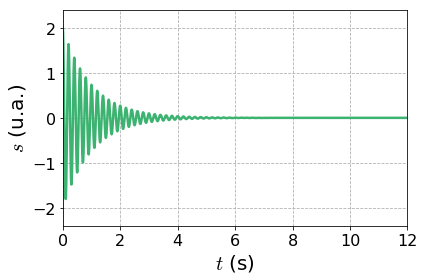

In [3]:
plt.xlim([0.0,12.])
plt.ylim([-2.4, 2.4])
plt.grid(linestyle='dashed')
plt.xlabel(r"$t$ (s)", fontsize=20)
plt.ylabel(r"$s$ (u.a.)", fontsize=20)

plt.plot(t, s(t), color='mediumseagreen', linewidth=2.5, marker='None')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

Sans rentrer dans des explications hors programme, la méthode de Hilbert consiste à prendre la TF du signal, à en couper la partie négative, puis à prendre la TF inverse de cette TF tronquée. Commençons par obtenir la TF.

In [4]:
tf = np.fft.fft(s(t))  #on fait la TF par l'algorithme de fast fourier transform (fft)

freq = np.fft.fftfreq(n=t.shape[-1], d=np.mean(np.diff(t))) #on définit les fréquences de l'axe des abscisses

Sp = np.square(np.abs(tf)) #on prend le module carré de la TF

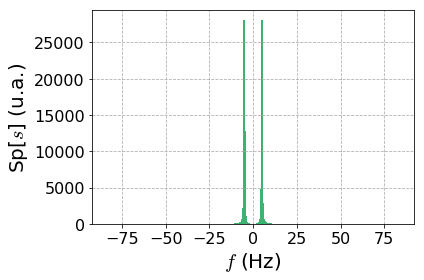

In [5]:
plt.grid(linestyle='dashed')
plt.xlabel(r"$f$ (Hz)", fontsize=20)
plt.ylabel(r"Sp[$s$] (u.a.)", fontsize=20)

plt.bar(freq,Sp,width=1,color='mediumseagreen') #on le trace comme un histogramme

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

Il faut maintenant retirer la partie de fréquence négative. L'affichage de $freq$ nous permet de voir qu'il s'agit de la deuxième moitié des valeurs.

In [6]:
# freq

In [7]:
SpT = np.concatenate((Sp[0:int(len(Sp)/2.)], np.zeros(int(len(Sp)/2.)))) #on retire la deuxième moitié des valeurs
#SpT

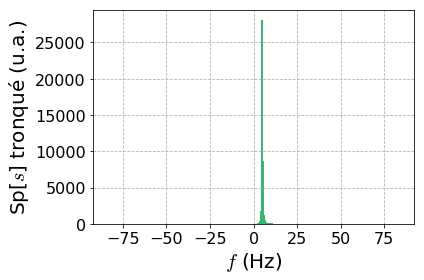

In [8]:
plt.grid(linestyle='dashed')
plt.xlabel(r"$f$ (Hz)", fontsize=20)
plt.ylabel(r"Sp[$s$] tronqué (u.a.)", fontsize=20)

plt.bar(freq,SpT,width=1,color='mediumseagreen') #on le trace comme un histogramme

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

Puis on prend la TF inverse de ce signal pour obtenir l'enveloppe du signal initial.

In [9]:
env = np.abs(np.fft.ifft(SpT)) #notez le ifft pour inverse fast fourier transform

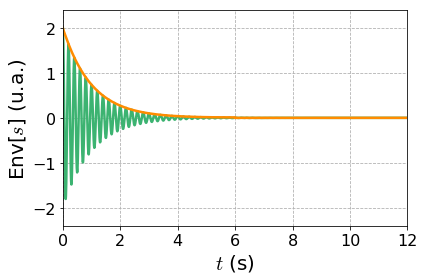

In [11]:
plt.xlim([0.0,12.])
plt.ylim([-2.4, 2.4])
plt.grid(linestyle='dashed')
plt.xlabel(r"$t$ (s)", fontsize=20)
plt.ylabel(r"Env[$s$] (u.a.)", fontsize=20)

envN = env * s(t)[0] / env[0] #on renormalise l'enveloppe à partir de sa valeur initiale 2
# et on retire à nouveau la deuxième moitié des valeurs
envNT = np.concatenate((envN[0:int(len(envN)/2.)], np.zeros(int(len(envN)/2.)))) 

plt.plot(t, s(t), color='mediumseagreen', linewidth=2.5, marker='None')
plt.plot(t, envNT, color='darkorange', linewidth=2.5, marker='None')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

***

## **3) Cas d'un signal modulé en amplitude**

***

Commençons par définir le signal, par exemple

$$ s(t) = 2\, \Big(1 + \frac{1}{5}\, \cos (2\, \pi\, f_0\,t) \Big) \cos (2\, \pi\, f\, t) $$

avec $f = 400$ Hz la fréquence du fondamental, et $f_0 = 52$ Hz. On a bien $f_0 \ll f$ : l'amplitude varie lentement devant la fréquence du signal.

In [70]:
t = np.linspace(0.,0.5,4000) #définition du temps (en seconde)

f = 400.
f0= 52.

def s(t) :
    return 2 * (1 + 0.2*np.cos(2*np.pi*f0*t)) * np.cos(2*np.pi*f*t)

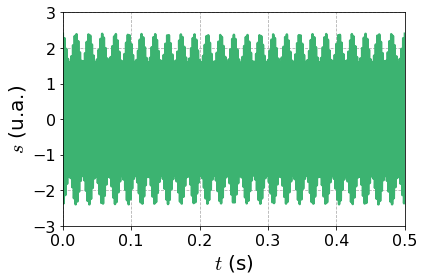

In [71]:
plt.xlim([0.0,0.5])
plt.ylim([-3., 3.])
plt.grid(linestyle='dashed')
plt.xlabel(r"$t$ (s)", fontsize=20)
plt.ylabel(r"$s$ (u.a.)", fontsize=20)

plt.plot(t, s(t), color='mediumseagreen', linewidth=2.5, marker='None')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

In [72]:
tf = np.fft.fft(s(t))  #on fait la TF par l'algorithme de fast fourier transform (fft)

freq = np.fft.fftfreq(n=t.shape[-1], d=np.mean(np.diff(t))) #on définit les fréquences de l'axe des abscisses

Sp = np.square(np.abs(tf)) #on prend le module carré de la TF

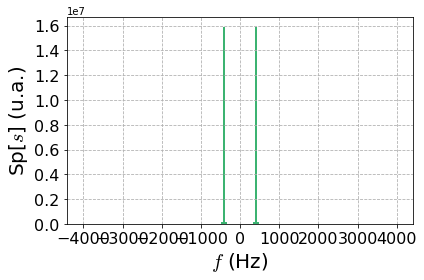

In [73]:
plt.grid(linestyle='dashed')
plt.xlabel(r"$f$ (Hz)", fontsize=20)
plt.ylabel(r"Sp[$s$] (u.a.)", fontsize=20)

plt.bar(freq,Sp,width=50,color='mediumseagreen') #on le trace comme un histogramme

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

In [74]:
SpT = np.concatenate((Sp[0:int(len(Sp)/2.)], np.zeros(int(len(Sp)/2.)))) #on retire la deuxième moitié des valeurs
#SpT

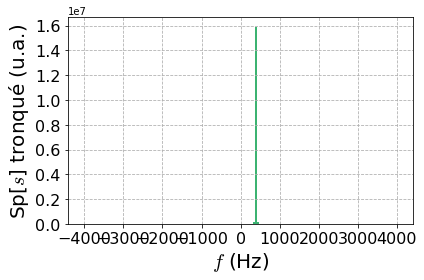

In [75]:
plt.grid(linestyle='dashed')
plt.xlabel(r"$f$ (Hz)", fontsize=20)
plt.ylabel(r"Sp[$s$] tronqué (u.a.)", fontsize=20)

plt.bar(freq,SpT,width=50,color='mediumseagreen') #on le trace comme un histogramme

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

In [76]:
env = np.abs(np.fft.ifft(SpT)) #notez le ifft pour inverse fast fourier transform

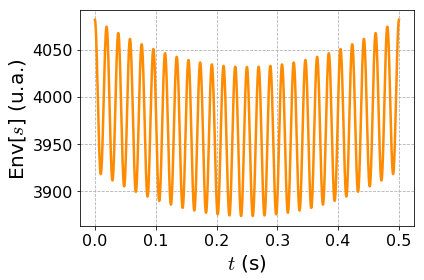

In [78]:
plt.grid(linestyle='dashed')
plt.xlabel(r"$t$ (s)", fontsize=20)
plt.ylabel(r"Env[$s$] (u.a.)", fontsize=20)

plt.plot(t, env, color='darkorange', linewidth=2.5, marker='None')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

qui fonctionne à peu près...